In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
# import library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import tree

In [3]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

# **EDA**

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [10]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [12]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [14]:
# declare features and target
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 79.0 KB


In [16]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: HeartDisease
Non-Null Count  Dtype
--------------  -----
918 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


In [17]:
len(df)

918

In [18]:
# lihat jumlah data
print(f'Count of X: {X.shape}\ncount of y: {y.shape}')

Count of X: (918, 11)
count of y: (918,)


In [19]:
c0 = df[df.HeartDisease==0]
c1 = df[df.HeartDisease==1]
print(f'count of data with label 0: {len(c0)}\ncount of data with label 1: {len(c1)}')

count of data with label 0: 410
count of data with label 1: 508


<Axes: xlabel='HeartDisease', ylabel='count'>

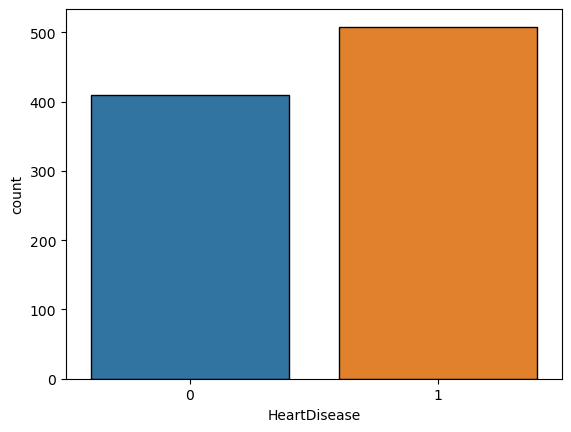

In [20]:
# see proportion of labels
sns.countplot(x='HeartDisease', data=df, edgecolor='black')

# 410 tidak menderita sakit jantung
# 508 menderita sakit jantung

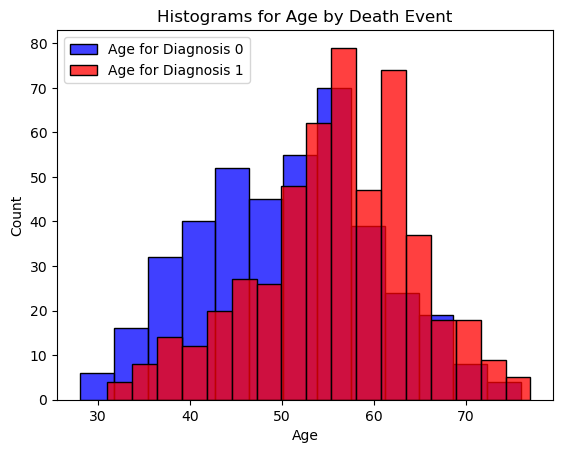

In [21]:
# plot comparison age by death event
sns.histplot(c0.Age,kde=False,color="blue", label="Age for Diagnosis 0")
sns.histplot(c1.Age,kde=False,color = "red", label = "Age for Diagnosis 1")
plt.title("Histograms for Age by Death Event")
plt.legend()

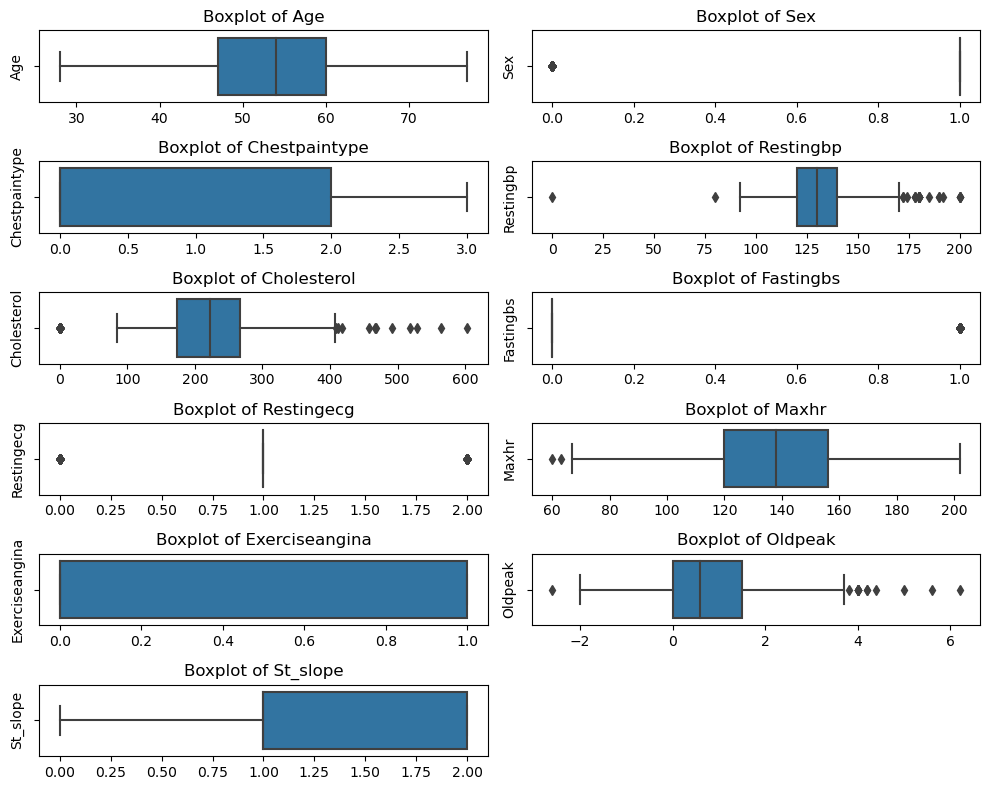

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the number of features and calculate the number of subplots needed
num_features = len(X.columns)
num_rows = (num_features - 1) // 2 + 1
num_cols = min(num_features, 2)

# Create the figure and axis
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 8))

# Flatten the axes if necessary
axes = axes.flatten()

# Loop through each feature and plot the boxplot
for i, feature in enumerate(X.columns):
    ax = axes[i]
    
    sns.boxplot(data=X, x=feature, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feature.capitalize())
    ax.set_title(f'Boxplot of {feature.capitalize()}')

# Hide any unused subplots
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

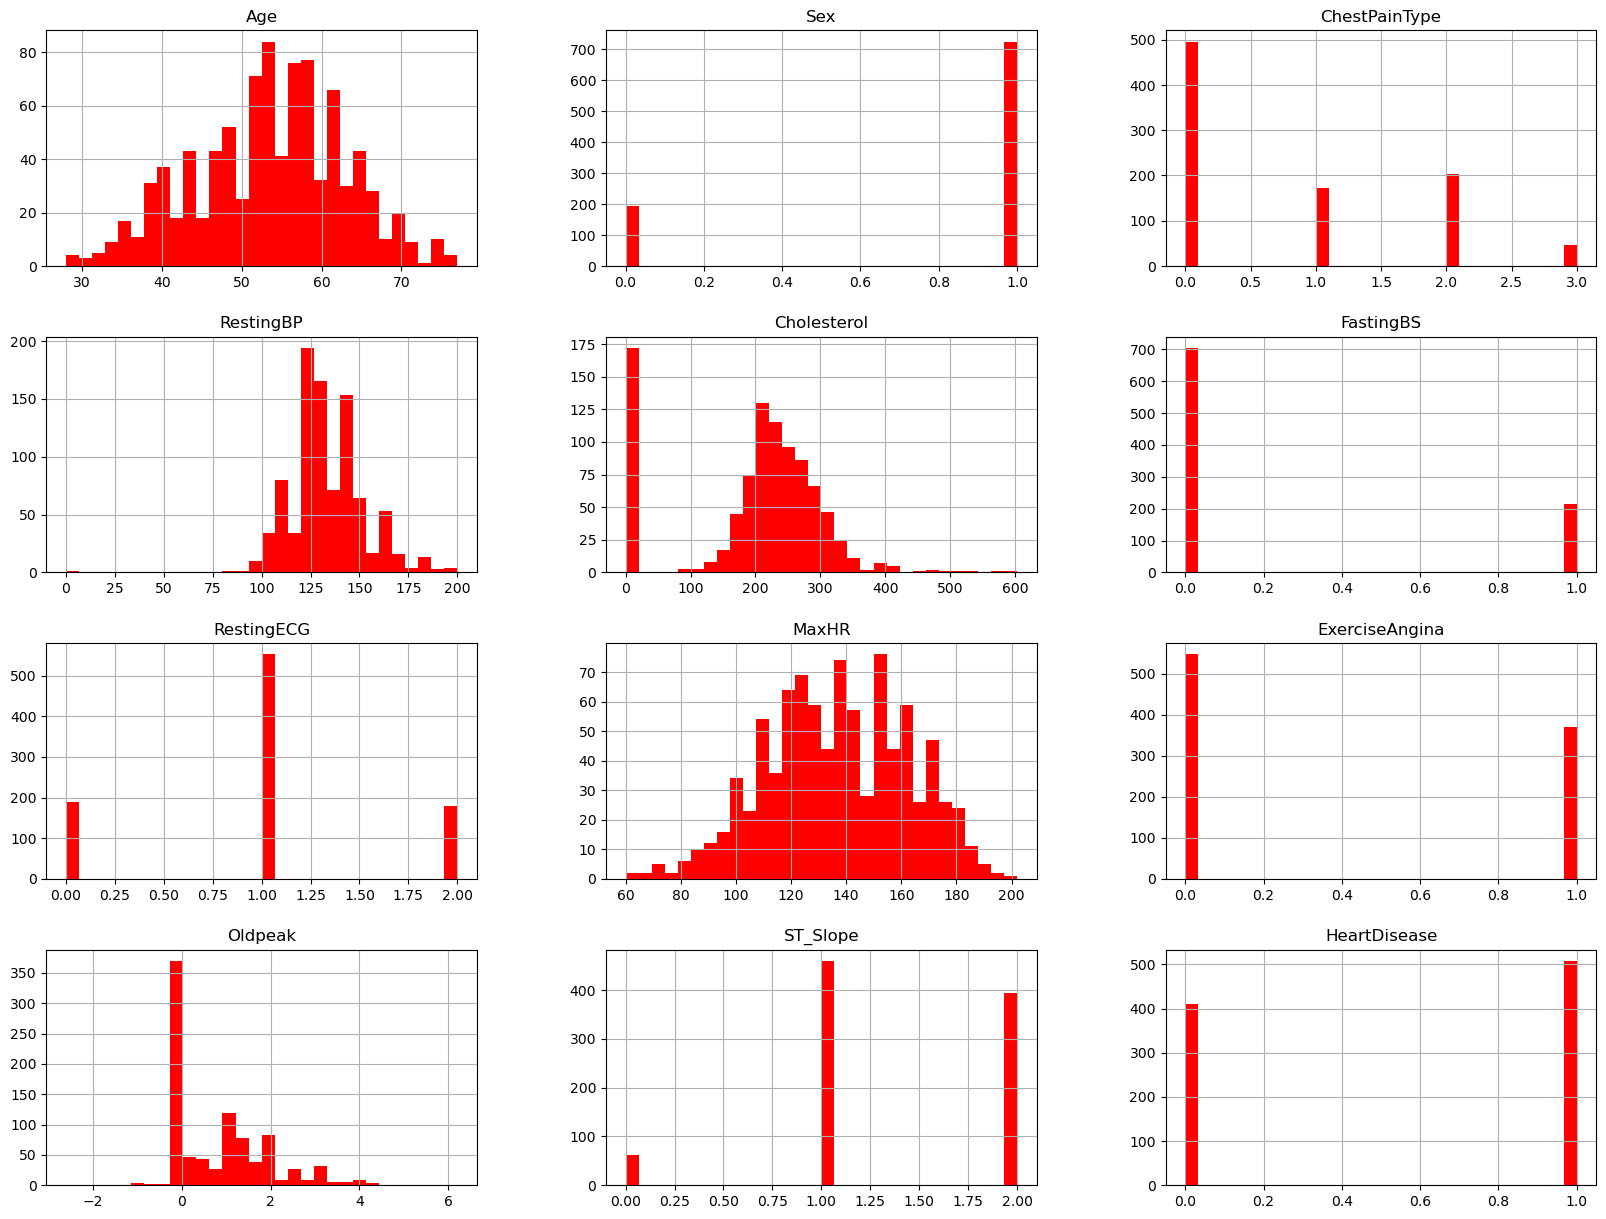

In [23]:
# Check Outlier Before Drop Outlier

df.hist(bins = 30, figsize=(20, 15), color = 'red');

In [24]:
print("Original DataFrame:")
pd.DataFrame(X.describe()).T

Original DataFrame:


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


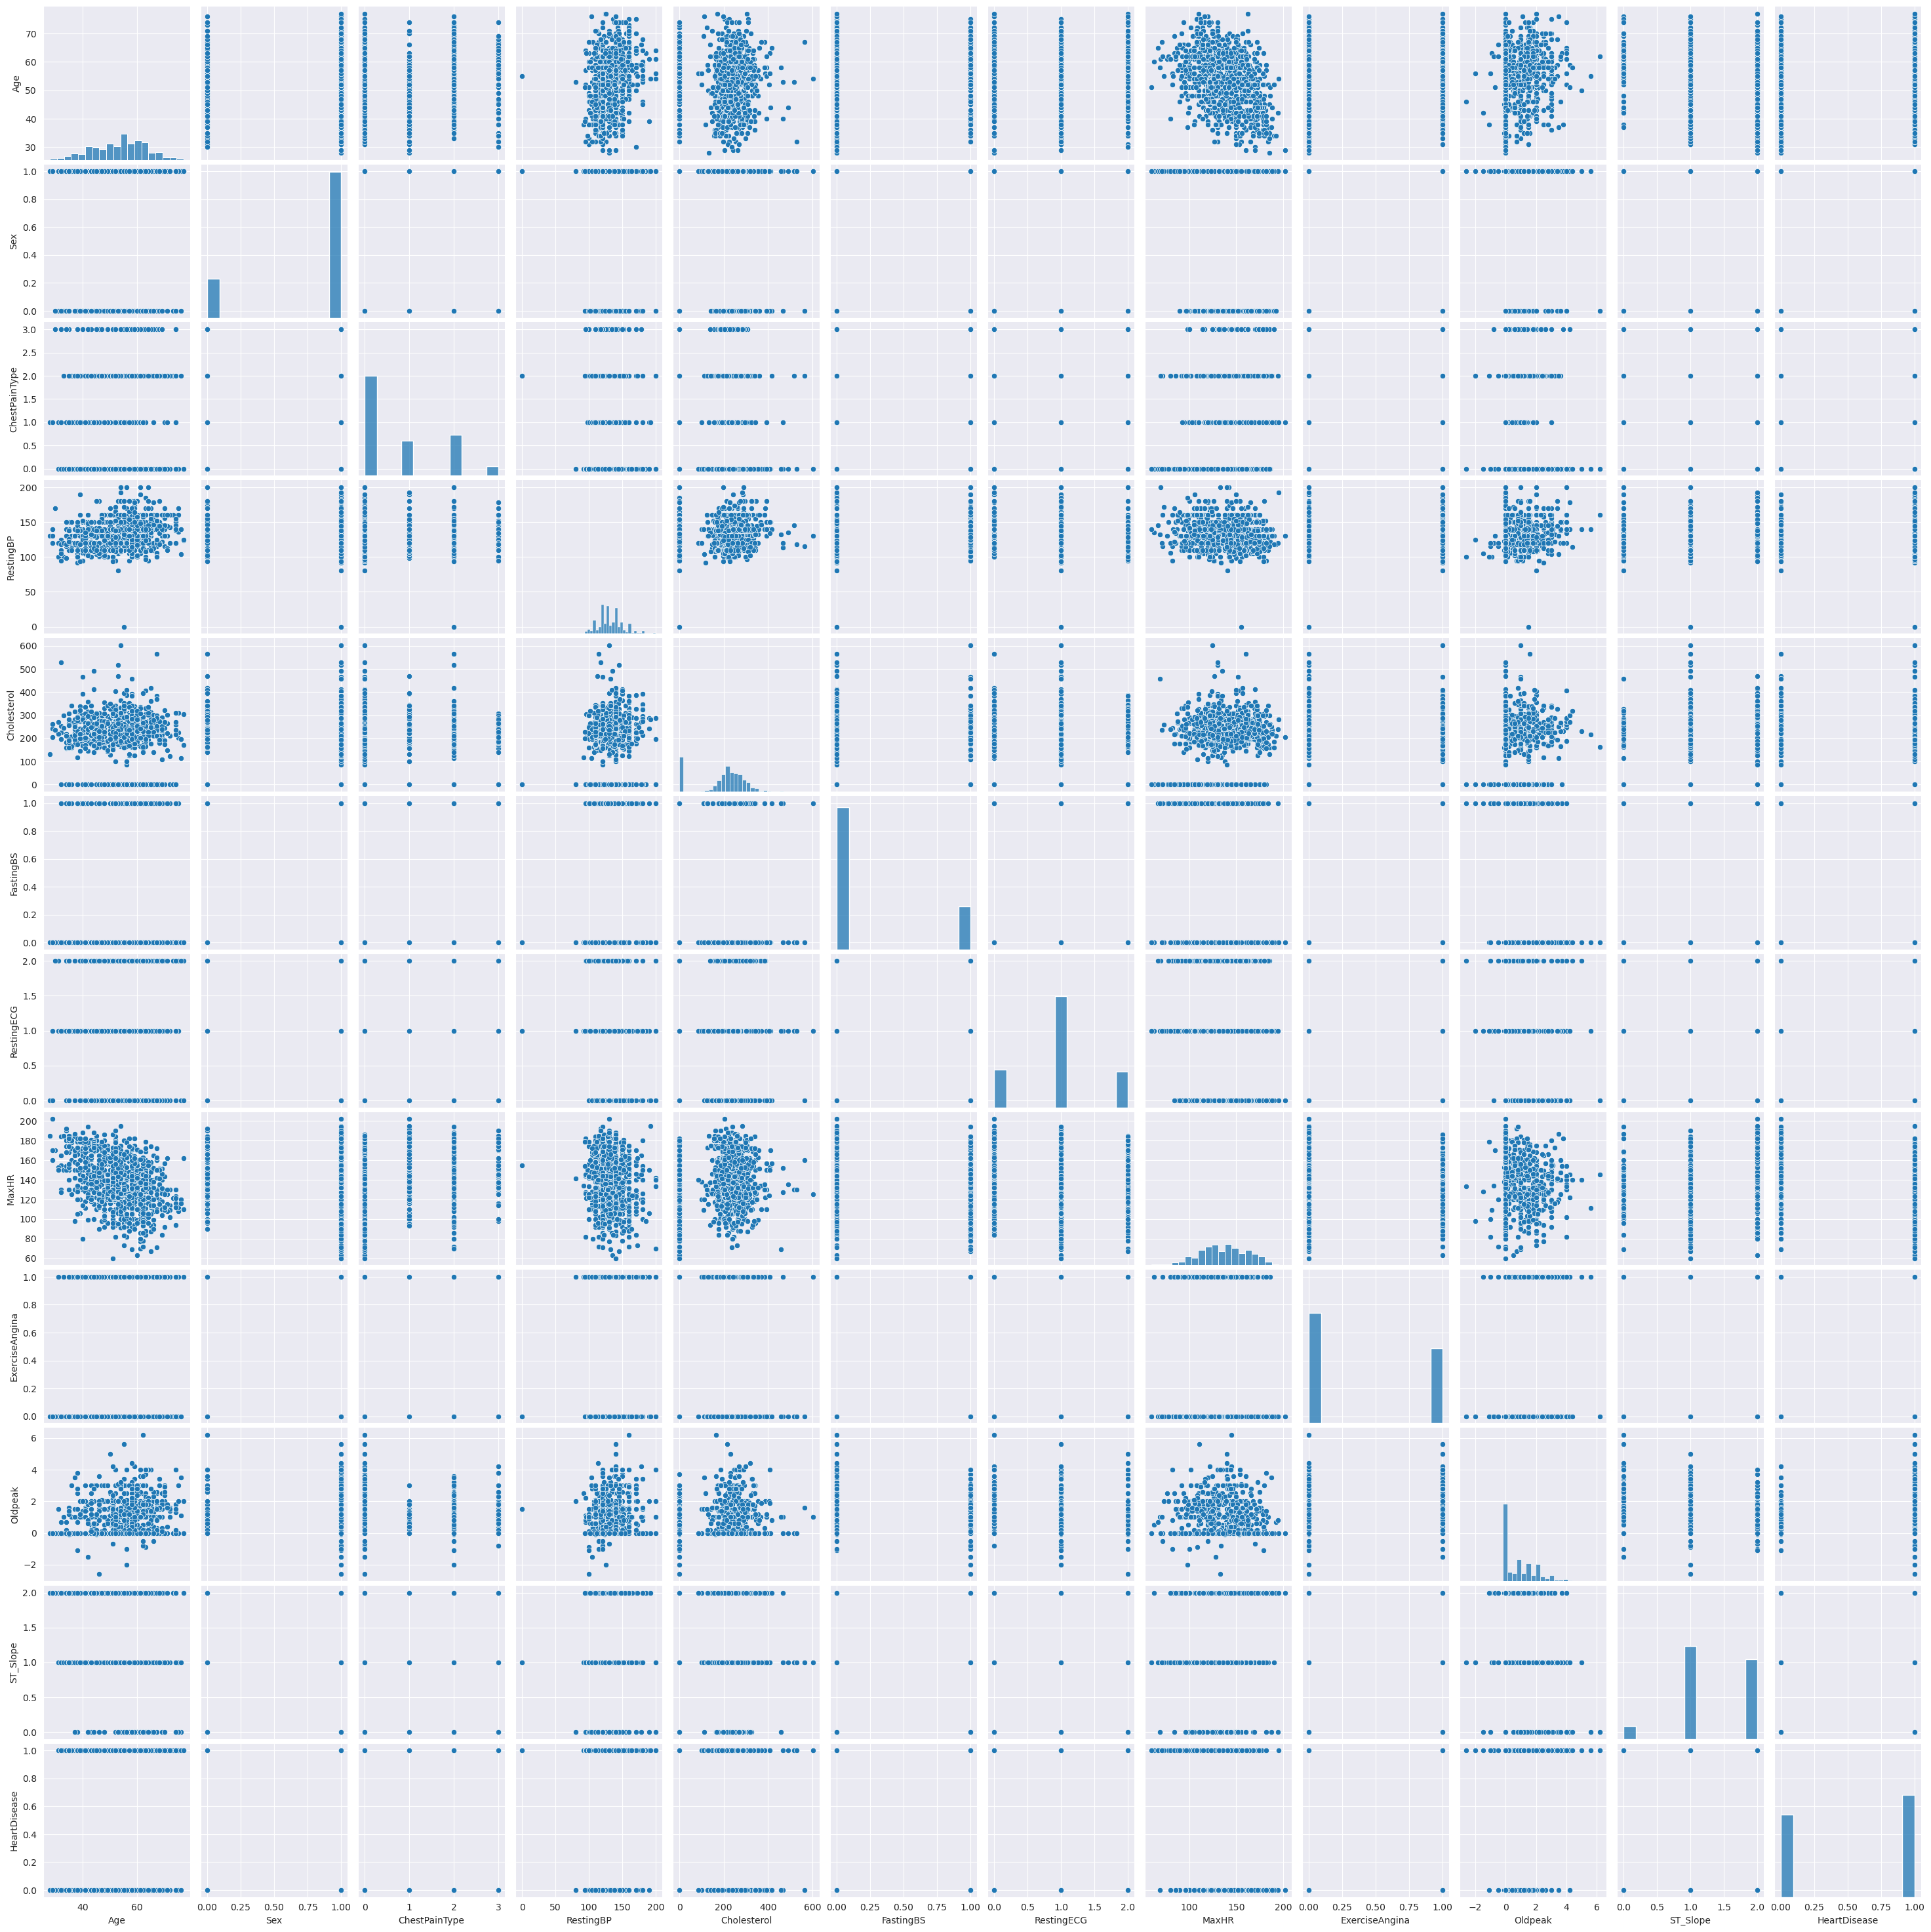

In [25]:
# visualize to see distribution of the data
sns.set_style(style='darkgrid')
sns.pairplot(df)

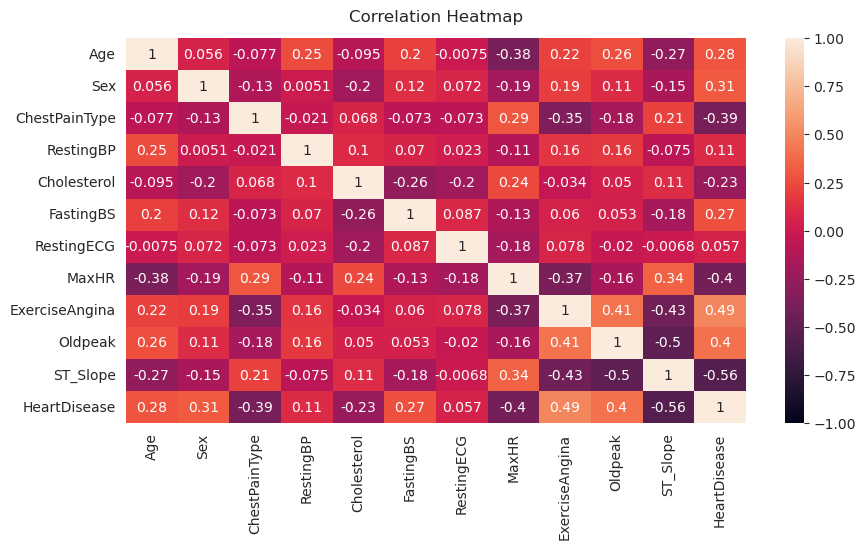

In [26]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [27]:
# # Convert input data to NumPy arrays
# X = np.array(X)
# y = np.array(y)

In [28]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=11)

# **Non Pruning Decision Tree**

In [29]:
# declare model dtc
dtc = DTC(random_state=11,
          criterion='entropy')

In [30]:
# fitting the train data into model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=11)

In [31]:
# do a prediction using test data
npr_pred = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, npr_pred)
acc_dtc

0.7739130434782608

In [32]:
# make a classification report
print(classification_report(y_test, npr_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.73       102
           1       0.78      0.83      0.80       128

    accuracy                           0.77       230
   macro avg       0.77      0.77      0.77       230
weighted avg       0.77      0.77      0.77       230



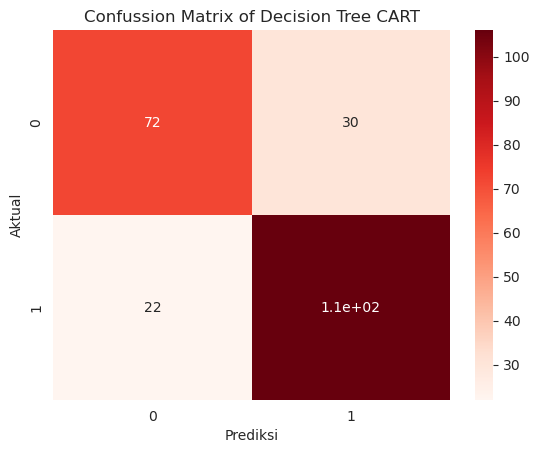

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, npr_pred)

ax = sns.heatmap(cm, annot=True, cmap="Reds")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of Decision Tree CART')
plt.show()

[[ 72  30]
 [ 22 106]]


<Axes: >

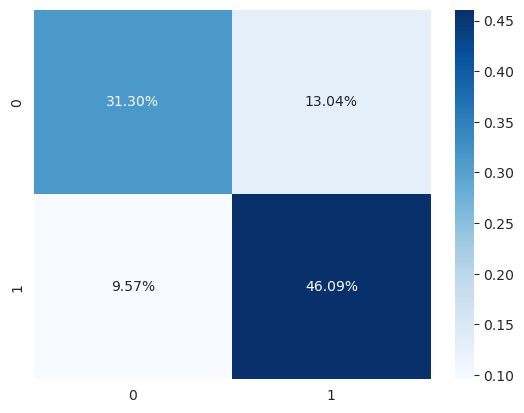

In [34]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, npr_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

[Text(0.569359756097561, 0.9642857142857143, 'x[10] <= 1.5\nentropy = 0.992\nsamples = 688\nvalue = [308, 380]'),
 Text(0.31859756097560976, 0.8928571428571429, 'x[7] <= 150.5\nentropy = 0.647\nsamples = 387\nvalue = [64, 323]'),
 Text(0.18292682926829268, 0.8214285714285714, 'x[8] <= 0.5\nentropy = 0.482\nsamples = 326\nvalue = [34, 292]'),
 Text(0.0975609756097561, 0.75, 'x[1] <= 0.5\nentropy = 0.747\nsamples = 108\nvalue = [23, 85]'),
 Text(0.04878048780487805, 0.6785714285714286, 'x[3] <= 134.0\nentropy = 0.985\nsamples = 21\nvalue = [12, 9]'),
 Text(0.024390243902439025, 0.6071428571428571, 'x[0] <= 60.5\nentropy = 0.619\nsamples = 13\nvalue = [11, 2]'),
 Text(0.012195121951219513, 0.5357142857142857, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.036585365853658534, 0.5357142857142857, 'x[9] <= 1.35\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.024390243902439025, 0.4642857142857143, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.04878048780487805, 0.4642

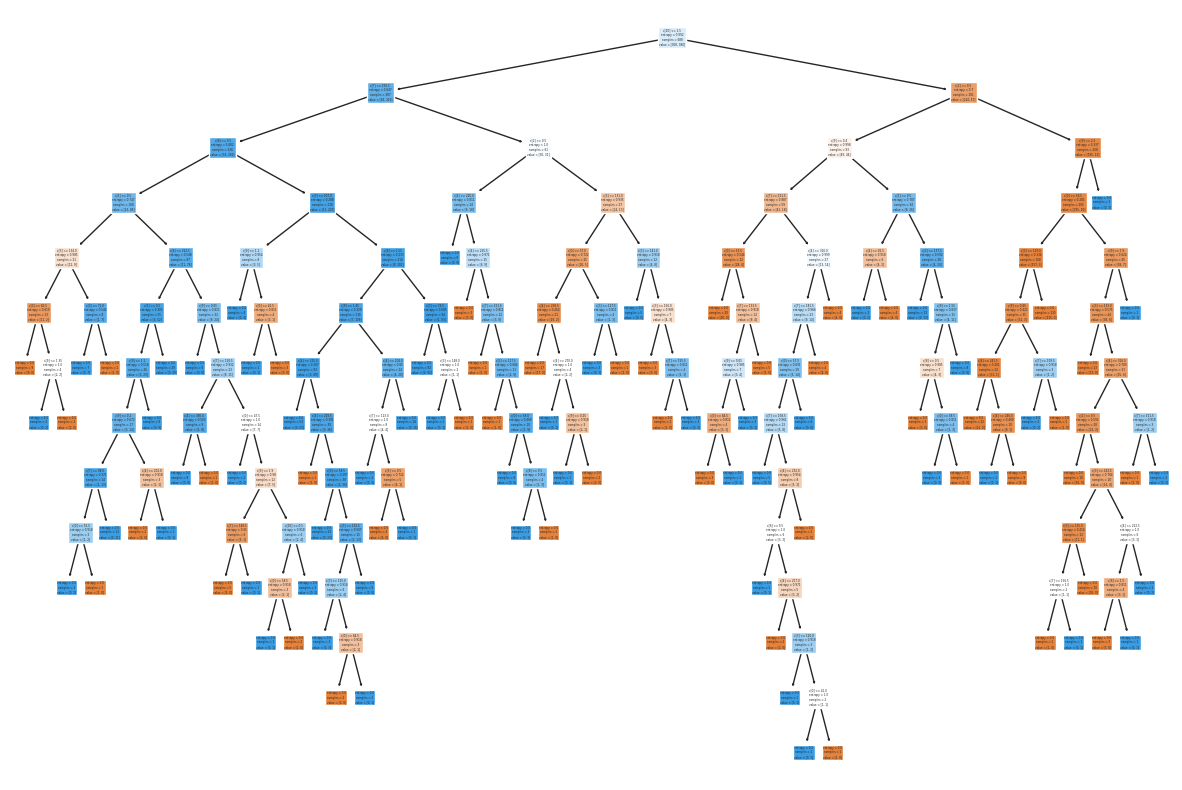

In [35]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

# **Cost Complexity Decision Tree**

In [36]:
clf = DTC(random_state=11, 
          criterion='entropy')

In [37]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [38]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DTC(random_state=11,
                             ccp_alpha=ccp_alpha, )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32182490253135


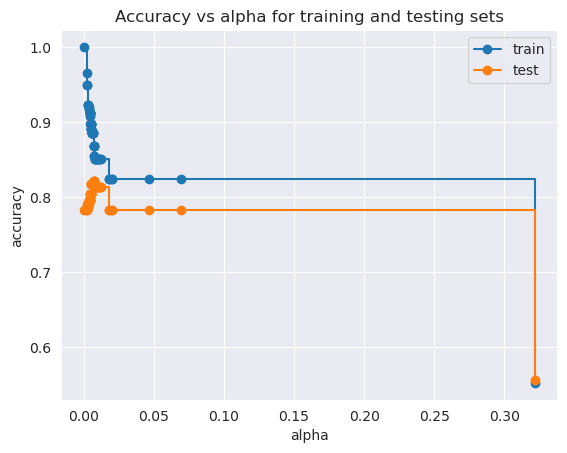

In [39]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [40]:
# in alpha -+0.3 accuracy model has incrased, use alpha 0.015 to pruning parameter (ccp_alpha)
# when more the alpha increases, the more the decision tree is cut
clf = DTC(random_state=11,
          ccp_alpha=0.015, 
          criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015, criterion='entropy', random_state=11)

In [41]:
# do a prediction and check accuracy score
pr_pred=clf.predict(X_test)
acc_prdtc = accuracy_score(y_test, pr_pred)
acc_prdtc

0.8260869565217391

In [42]:
# print classification report
print(classification_report(y_test, pr_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.78       102
           1       0.80      0.91      0.85       128

    accuracy                           0.83       230
   macro avg       0.84      0.81      0.82       230
weighted avg       0.83      0.83      0.82       230



[Text(0.5, 0.9, 'x[10] <= 1.5\nentropy = 0.992\nsamples = 688\nvalue = [308, 380]'),
 Text(0.3076923076923077, 0.7, 'x[7] <= 150.5\nentropy = 0.647\nsamples = 387\nvalue = [64, 323]'),
 Text(0.23076923076923078, 0.5, 'x[8] <= 0.5\nentropy = 0.482\nsamples = 326\nvalue = [34, 292]'),
 Text(0.15384615384615385, 0.3, 'x[1] <= 0.5\nentropy = 0.747\nsamples = 108\nvalue = [23, 85]'),
 Text(0.07692307692307693, 0.1, 'entropy = 0.985\nsamples = 21\nvalue = [12, 9]'),
 Text(0.23076923076923078, 0.1, 'entropy = 0.548\nsamples = 87\nvalue = [11, 76]'),
 Text(0.3076923076923077, 0.3, 'entropy = 0.288\nsamples = 218\nvalue = [11, 207]'),
 Text(0.38461538461538464, 0.5, 'entropy = 1.0\nsamples = 61\nvalue = [30, 31]'),
 Text(0.6923076923076923, 0.7, 'x[2] <= 0.5\nentropy = 0.7\nsamples = 301\nvalue = [244, 57]'),
 Text(0.5384615384615384, 0.5, 'x[9] <= 0.4\nentropy = 0.998\nsamples = 93\nvalue = [49, 44]'),
 Text(0.46153846153846156, 0.3, 'entropy = 0.887\nsamples = 59\nvalue = [41, 18]'),
 Text(0.

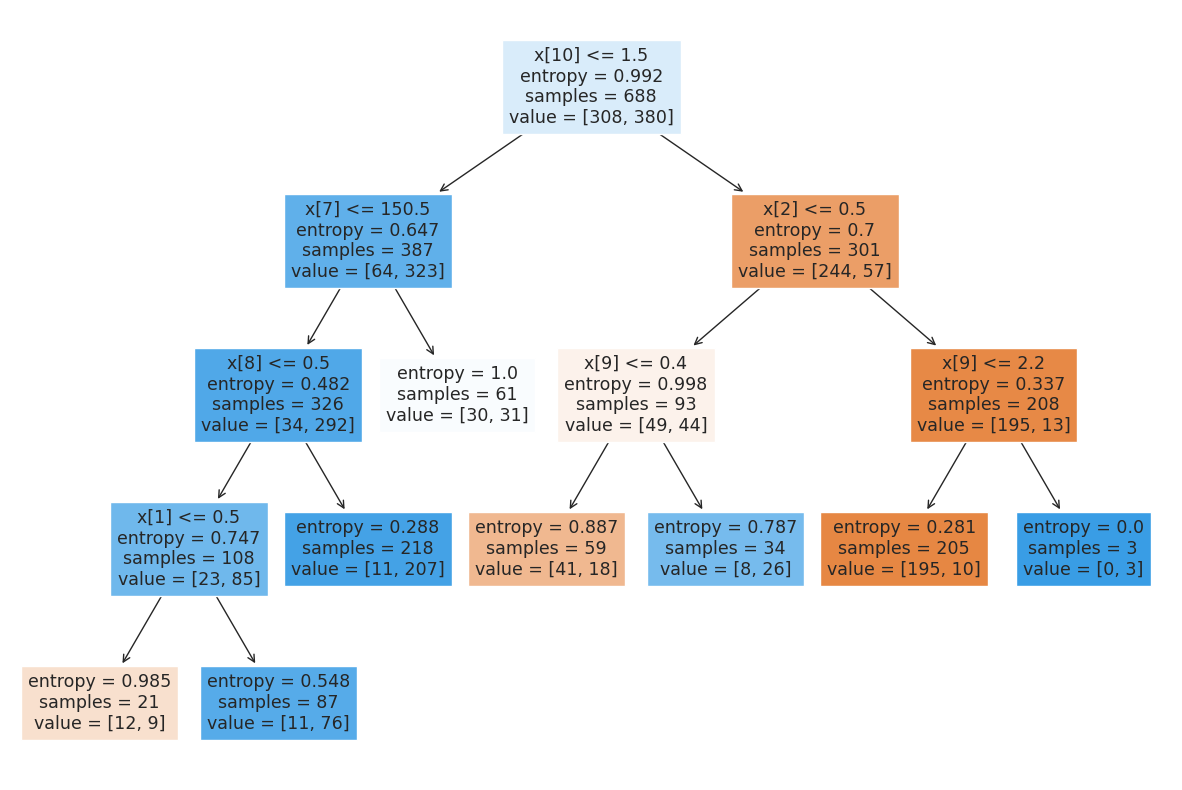

In [43]:
# visualize the pruned tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

# **Bagging Classifier**

In [44]:
# base_estimator = DTC()
# bagging = BaggingClassifier(base_estimator)

# param_grid = {
#     'base_estimator__max_depth': [None, 3, 5],
#     'n_estimators': [10, 50, 100],
#     'max_samples': [0.5, 0.7, 0.9],
#     'max_features': [0.5, 0.7, 0.9],
#     'bootstrap': [True, False],
#     'bootstrap_features': [True, False],
#     'random_state': [42]
# }

# grid_search = GridSearchCV(bagging, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

In [45]:
# declare model bagging classifier with best parameter from hyperparameter tuning
bcl = BaggingClassifier(estimator=DTC(criterion='entropy',random_state=11), 
                        n_estimators=100, max_samples=0.9,max_features=0.7, random_state=11, n_jobs=-1)

In [46]:
# fitting the model
bcl.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   random_state=11),
                  max_features=0.7, max_samples=0.9, n_estimators=100,
                  n_jobs=-1, random_state=11)

In [47]:
# do prediction with data test
bcl_pred = bcl.predict(X_test)

In [48]:
# write accuracy score
acc_bcl = accuracy_score(y_test, bcl_pred)
acc_bcl

0.8521739130434782

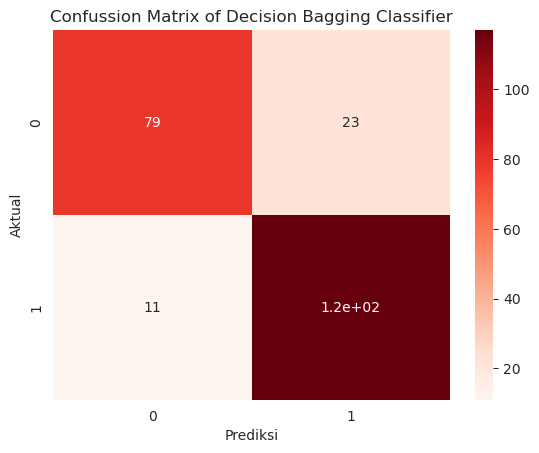

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, bcl_pred)

ax = sns.heatmap(cm, annot=True, cmap="Reds")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of Decision Bagging Classifier')
plt.show()

In [50]:
# make classification report
print(classification_report(y_test, bcl_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.84      0.91      0.87       128

    accuracy                           0.85       230
   macro avg       0.86      0.84      0.85       230
weighted avg       0.85      0.85      0.85       230



# **Random Forest**

In [51]:
# declare model random forest with best parameter from hyperparameter tuning
rf = RandomForestClassifier(n_estimators=100,
                            criterion='entropy',
                            max_features=0.5,
                            min_samples_leaf=10,
                            random_state=11,
                            n_jobs=1)

In [52]:
# fit data train into model
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=0.5,
                       min_samples_leaf=10, n_jobs=1, random_state=11)

In [53]:
# do prediction
rf_pred = rf.predict(X_test)

In [54]:
# print accuracy score
acc_rf = accuracy_score(y_test, rf_pred)
acc_rf

0.8217391304347826

In [55]:
# print classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       102
           1       0.81      0.88      0.85       128

    accuracy                           0.82       230
   macro avg       0.82      0.81      0.82       230
weighted avg       0.82      0.82      0.82       230



# **Test Oversampling using SMOTE**

In [56]:
# using imblearn to stratified label
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [57]:
df_plt = pd.DataFrame(y_res)

<Axes: xlabel='HeartDisease', ylabel='count'>

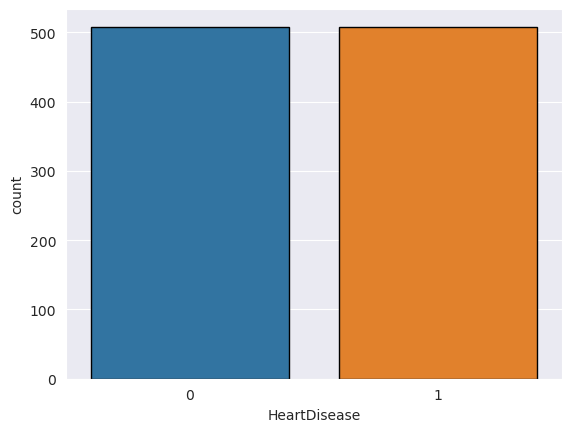

In [58]:
# plot y after oversampling
sns.countplot(x='HeartDisease', data=df_plt, edgecolor='black')

<Axes: xlabel='HeartDisease', ylabel='count'>

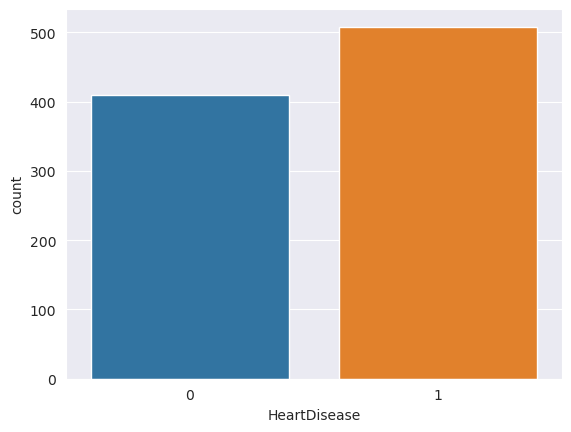

In [59]:
# see proportion of labels
sns.countplot(x='HeartDisease', data=df)

# 410 tidak menderita sakit jantung
# 508 menderita sakit jantung

In [60]:
# split the data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, 
                                                    y_res, 
                                                    test_size=0.25, 
                                                    random_state=11)

In [61]:
# look shape of data before oversampling
print(f'Count of X: {X.shape}\ncount of y: {y.shape}')

Count of X: (918, 11)
count of y: (918,)


In [62]:
# look shape of data after oversampling
print(f'Count of X: {X_res.shape}\ncount of y: {y_res.shape}')

Count of X: (1016, 11)
count of y: (1016,)


In [63]:
# do a prediction and check accuracy score
pr_pred_res=bcl.predict(X_test_res)
acc_ovsbcl = accuracy_score(y_test_res, pr_pred_res)
acc_ovsbcl

0.889763779527559

In [64]:
print(classification_report(y_test_res, pr_pred_res))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       126
           1       0.84      0.97      0.90       128

    accuracy                           0.89       254
   macro avg       0.90      0.89      0.89       254
weighted avg       0.90      0.89      0.89       254



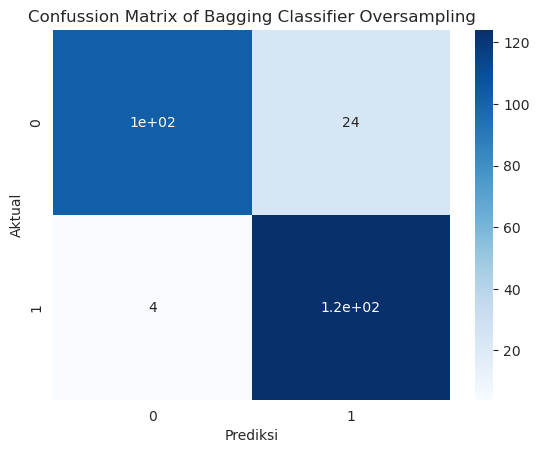

<Figure size 400x200 with 0 Axes>

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test_res, pr_pred_res)

ax = sns.heatmap(cm, annot=True, cmap="Blues")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of Bagging Classifier Oversampling')
plt.figure(figsize=(4, 2))
plt.show()

# **Test With Scaled Data**

In [66]:
ss = StandardScaler() # Standardization
mms = MinMaxScaler() # MinMaxScaler

In [67]:
ss_X_train = ss.fit_transform(X_train)
ss_X_test = ss.fit_transform(X_test)
mms_X_train = mms.fit_transform(X_train)
mms_X_test = mms.fit_transform(X_test)

In [68]:
# fitting the train data into model
dtc.fit(ss_X_train, y_train)

# do a prediction using test data
npr_pred1=dtc.predict(ss_X_test)
acc_ss_dtc = accuracy_score(y_test, npr_pred1)
print(f'accuration of Standarized Decision Tree : {acc_ss_dtc}')

# fitting the train data into model
dtc.fit(mms_X_train, y_train)

# do a prediction using test data
npr_pred2=dtc.predict(mms_X_test)
acc_mms_dtc = accuracy_score(y_test, npr_pred2)
print(f'accuration of MinMaxScaled Decision Tree : {acc_mms_dtc}')

accuration of Standarized Decision Tree : 0.7391304347826086
accuration of MinMaxScaled Decision Tree : 0.7565217391304347


In [69]:
# fitting the train data into model
clf.fit(ss_X_train, y_train)

# do a prediction using test data
pr_pred1=clf.predict(ss_X_test)
acc_ss_dtcpr = accuracy_score(y_test, pr_pred1)
print(f'accuration of Standarized Decision Tree Pruning: {acc_ss_dtcpr}')

# fitting the train data into model
clf.fit(mms_X_train, y_train)

# do a prediction using test data
npr_pred2=clf.predict(mms_X_test)
acc_mms_dtcpr = accuracy_score(y_test, npr_pred2)
print(f'accuration of MinMaxScaled Decision Tree Pruning: {acc_mms_dtcpr}')

accuration of Standarized Decision Tree Pruning: 0.8260869565217391
accuration of MinMaxScaled Decision Tree Pruning: 0.7565217391304347


In [70]:
# fitting the train data into model
bcl.fit(ss_X_train, y_train)

# do a prediction using test data
bcl_pred1=bcl.predict(ss_X_test)
acc_ss_bcl = accuracy_score(y_test, bcl_pred1)
print(f'accuration of Standarized Bagging Classifier: {acc_ss_bcl}')

# fitting the train data into model
bcl.fit(mms_X_train, y_train)

# do a prediction using test data
npr_pred2=bcl.predict(mms_X_test)
acc_mms_bcl = accuracy_score(y_test, npr_pred2)
print(f'accuration of MinMaxScaled Bagging Classifier: {acc_mms_bcl}')

accuration of Standarized Bagging Classifier: 0.8391304347826087
accuration of MinMaxScaled Bagging Classifier: 0.7956521739130434


In [71]:
# fitting the train data into model
rf.fit(ss_X_train, y_train)

# do a prediction using test data
rf_pred1=rf.predict(ss_X_test)
acc_ss_rf = accuracy_score(y_test, rf_pred1)
print(f'accuration of Standarized Random Forest: {acc_ss_rf}')

# fitting the train data into model
rf.fit(mms_X_train, y_train)

# do a prediction using test data
rf_pred2=rf.predict(mms_X_test)
acc_mms_rf = accuracy_score(y_test, npr_pred2)
print(f'accuration of MinMaxScaled Random Forest: {acc_mms_rf}')

accuration of Standarized Random Forest: 0.8173913043478261
accuration of MinMaxScaled Random Forest: 0.7956521739130434


# **Test Splitting Using K-Fold Cross Validation**

In [72]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(clf, X, y, cv=5))
print(cross_val_score(clf, X, y, cv=5).mean())

[0.86413043 0.84782609 0.79347826 0.79234973 0.69398907]
0.7983547160845806


In [73]:
import numpy as np
from sklearn.model_selection import KFold

Xcv = df.iloc[:, :-1]
ycv = df.iloc[:, -1]

kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = Xcv.iloc[train_index], Xcv.iloc[test_index]
    y_train_cv, y_test_cv = ycv.iloc[train_index], ycv.iloc[test_index]

In [74]:
# KFold Cross Validation Decision Tree

# fitting the model
dtc.fit(X_train_cv, y_train_cv)
# do prediction with data test
dtccv_pred = dtc.predict(X_test_cv)
# write accuracy score
acc_dtccv = accuracy_score(y_test_cv, dtccv_pred)
acc_dtccv

0.7538126361655774

In [75]:
# KFold Cross Validation Decision Tree Pruning

# fitting the model
clf.fit(X_train_cv, y_train_cv)
# do prediction with data test
prdtccv_pred = clf.predict(X_test_cv)
# write accuracy score
acc_prdtccv = accuracy_score(y_test_cv, prdtccv_pred)
acc_prdtccv

0.7581699346405228

In [76]:
# KFold Cross Validation Random Forest

# fitting the model
rf.fit(X_train_cv, y_train_cv)
# do prediction with data test
rfcv_pred = rf.predict(X_test_cv)
# write accuracy score
acc_rfcv = accuracy_score(y_test_cv, rfcv_pred)
acc_rfcv

0.7603485838779956

In [77]:
# KFold Cross Validation Bagging Classifier

# fitting the model
bcl.fit(X_train_cv, y_train_cv)
# do prediction with data test
bclcv_pred = bcl.predict(X_test_cv)
# write accuracy score
acc_bclcv = accuracy_score(y_test_cv, bclcv_pred)
acc_bclcv

0.7930283224400871

# **Test Using Repeat Stratified K-Fold**

In [78]:
def model(classifier):
    classifier.fit(X_train,y_train)
    ml_pred = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    print(classification_report(y_test, ml_pred))

In [79]:
model(dtc)

              precision    recall  f1-score   support

           0       0.77      0.71      0.73       102
           1       0.78      0.83      0.80       128

    accuracy                           0.77       230
   macro avg       0.77      0.77      0.77       230
weighted avg       0.77      0.77      0.77       230



In [80]:
model(clf)

              precision    recall  f1-score   support

           0       0.87      0.72      0.78       102
           1       0.80      0.91      0.85       128

    accuracy                           0.83       230
   macro avg       0.84      0.81      0.82       230
weighted avg       0.83      0.83      0.82       230



In [81]:
model(bcl)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.84      0.91      0.87       128

    accuracy                           0.85       230
   macro avg       0.86      0.84      0.85       230
weighted avg       0.85      0.85      0.85       230



In [82]:
model(rf)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       102
           1       0.81      0.88      0.85       128

    accuracy                           0.82       230
   macro avg       0.82      0.81      0.82       230
weighted avg       0.82      0.82      0.82       230



In [83]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=1)
model(knn)

              precision    recall  f1-score   support

           0       0.58      0.52      0.55       102
           1       0.64      0.70      0.67       128

    accuracy                           0.62       230
   macro avg       0.61      0.61      0.61       230
weighted avg       0.61      0.62      0.61       230



In [84]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

bnb = BernoulliNB()
model(bnb)

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       102
           1       0.80      0.81      0.81       128

    accuracy                           0.78       230
   macro avg       0.78      0.78      0.78       230
weighted avg       0.78      0.78      0.78       230



In [85]:
gnb = GaussianNB()
model(gnb)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       102
           1       0.83      0.88      0.85       128

    accuracy                           0.83       230
   macro avg       0.83      0.82      0.83       230
weighted avg       0.83      0.83      0.83       230



# **Combine Model With All Best Result**

In [86]:
ss_X_train_res = ss.fit_transform(X_train_res)
ss_X_test_res = ss.fit_transform(X_test_res)

In [87]:
# combine all best result in this case all best result improving model is {'standarization bcl', 'oversampling bcl'}
# fitting the train data into model
bcl.fit(ss_X_train_res, y_train_res)

# do a prediction using test data
ssbclres_pred=bcl.predict(ss_X_test_res)
acc_ssbclres = accuracy_score(y_test_res, ssbclres_pred)
print(f'accuration of Standarized Bagging Classifier: {acc_ssbclres}')

accuration of Standarized Bagging Classifier: 0.8307086614173228


# **Model Comparison**

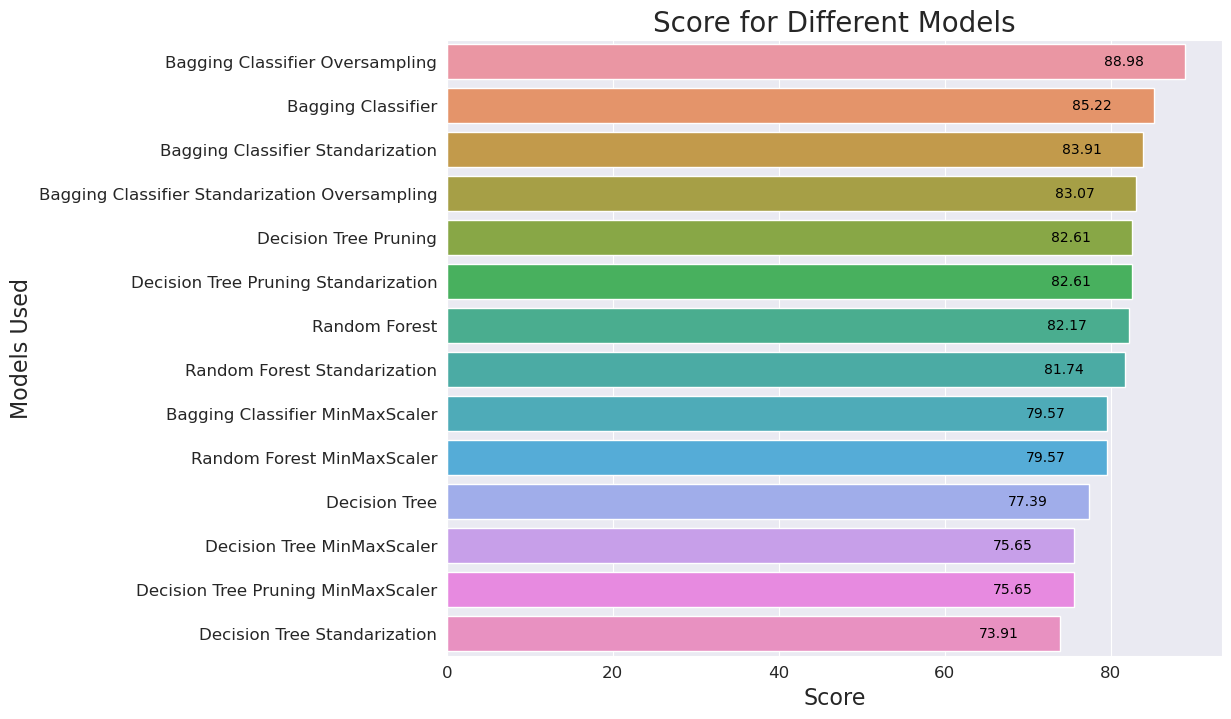

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Decision Tree': acc_dtc * 100,
    'Decision Tree Pruning': acc_prdtc * 100,
    'Bagging Classifier': acc_bcl * 100,
    'Random Forest': acc_rf * 100,
    'Bagging Classifier Oversampling': acc_ovsbcl * 100,
    'Decision Tree Standarization': acc_ss_dtc * 100,
    'Decision Tree MinMaxScaler': acc_mms_dtc * 100,
    'Decision Tree Pruning Standarization': acc_ss_dtcpr * 100,
    'Decision Tree Pruning MinMaxScaler': acc_mms_dtcpr * 100,
    'Bagging Classifier Standarization': acc_ss_bcl * 100,
    'Bagging Classifier MinMaxScaler': acc_mms_bcl * 100,
    'Random Forest Standarization': acc_ss_rf * 100,
    'Random Forest MinMaxScaler': acc_mms_rf * 100,
    'Bagging Classifier Oversampling': acc_ovsbcl * 100,
    'Bagging Classifier Standarization Oversampling': acc_ssbclres * 100
}

# Sort the dictionary by values in descending order
data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True))

models = list(data.keys())
score = [round(val, 2) for val in data.values()]

fig = plt.figure(figsize=(10, 8))
ax = sns.barplot(x=score, y=models)

# Add rounded accuracy scores on the left side of each bar
for i in range(len(score)):
    ax.text(score[i] - 5, i, str(score[i]), ha='right', va='center', color='black', fontweight='light')

plt.xlabel("Score", size=16)
plt.xticks(size=12)
plt.ylabel("Models Used", size=16)
plt.yticks(size=12)
plt.title("Score for Different Models", size=20)
plt.show()